In [1]:
using GPlot

┌ Info: Recompiling stale cache file /Users/tlienart/.julia/compiled/v1.1/GPlot/3kxwE.ji for GPlot [761cd3e3-77fb-536d-8887-987003f9acc3]
└ @ Base loading.jl:1184


Looking for a backend....found GLE ✅
Warmup................done in 2.8s ✅


1. [x] decay -- **a few details missing**
1. [x] quantilescale -- **a few details missing**
1. [ ] bar3d
1. [x] semitrans -- **a few details missing**
1. [x] sqroot
1. [ ] entropy
1. [ ] polargrid
1. [ ] shadow
1. [ ] shadebar
1. [ ] inx

## 1. decay

![](targets/2d-complex1/decay.png)

**Missing**

* Text in graph not title (actually a legend)
* Command to remove spine on x2 and y2 axis.

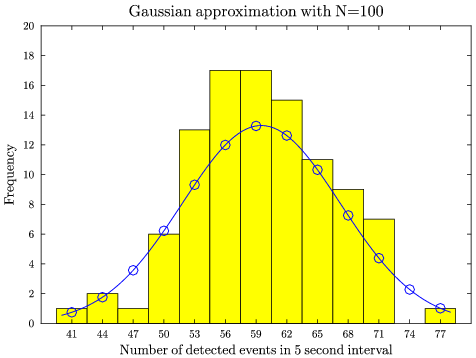

In [2]:
using DelimitedFiles
using Statistics

dat = readdlm("targets/2d-complex1/decay.dat")

f = Figure(font="texcmr")
bar(dat[:, 1], dat[:, 2], fcol="yellow", ecol="black", width=3)

# gaussian approx
x  = range(40, stop=78, length=100)
x2 = 41:3:77 
mu = 59.51
sigma = sqrt(mu)
g(x) = (sum(dat[:, 2])/3) / (sqrt(2*pi)) .* exp.(-(x.-mu).^2/(2*sigma^2))
y  = g(x)
y2 = g(x2)
plot!(x, y, color="blue")
plot!(x2, y2, ls="none",marker="o",mcol="blue")

ylim(0, 20)
xticks(collect(x2))
xlim(38, 80)
ylabel("Frequency")
xlabel("Number of detected events in 5 second interval")
title("Gaussian approximation with N=100")

preview(f)

## 2. quantilescale

![](targets/2d-complex1/quantilescale.png)

**Missing**

* automatic setting for math

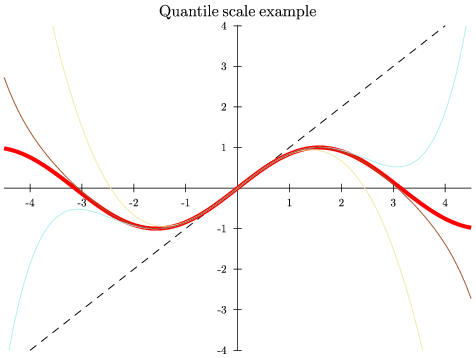

In [3]:
f = Figure(font="texcmr")

g1(x) = @. sin(x)
g2(x) = @. x-x^3/6
g3(x) = @. x-x^3/6+x^5/120
g4(x) = @. x-x^3/6+x^5/120-x^7/5040

x = range(-4.5, stop=4.5, length=100)
plot!(x, x, color="black", ls="--")
plot!(x, g1(x), color="red", lw=.1)
plot!(x, g2(x), color="palegoldenrod")
plot!(x, g3(x), color="paleturquoise")
plot!(x, g4(x), color="sienna")

title("Quantile scale example") # no quantile scale here...

gca().math = true

xlim(-4.5, 4.5)
ylim(-4, 4)

preview(f)

## 3. semitrans

![](targets/2d-complex1/semitrans.png)

**Missing**
* legend background color

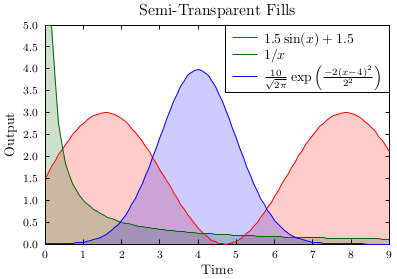

In [4]:
Figure(size=(10, 7), tex=true, transparency=true)

x = range(0, stop=9, length=100)
g1(x) = @. sin(x)*1.5 + 1.5
g2(x) = @. (x <= 0.2)*5 + (x>0.2)*(1/x)
g3(x) = @. 10*(1/sqrt(2*pi))*exp(-2*((x-4)^2/4))

fill_between(x, 0, g1(x), fill="red", alpha=0.2)
fill_between!(x, 0, g2(x), fill="darkgreen", alpha=0.2)
fill_between!(x, 0, g3(x), fill="blue", alpha=0.2)
plot!(x, g1(x), color="red", label=t"$1.5\sin(x)+1.5$")
plot!(x, g2(x), color="darkgreen", label=t"$1/x$")
plot!(x, g3(x), color="blue", label=t"${10\over \sqrt{2\pi}}\exp\left({-2(x-4)^2\over 2^2}\right)$")

legend()

xlabel("Time")
ylabel("Output")
title("Semi-Transparent Fills")

preview(gcf())

## 5. sqroot

![](targets/2d-complex1/sqroot.png)

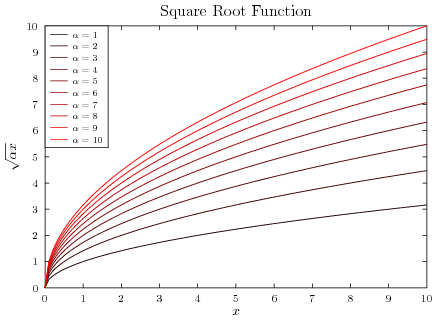

In [5]:
using Colors

f = Figure(size=(11, 8), latex=true)
x = range(0, stop=10, length=100);
alphas = 1:10
for alpha ∈ alphas
    plot!(x, sqrt.(alpha * x), col=RGB(alpha/10,0,0),
          label=tex"$\alpha=##alpha$")
end
xtitle!(t"$x$")
ytitle!(t"$\sqrt{\alpha x}$")
title!("Square Root Function")
legend(pos="tl", fontsize=7)

preview(gcf())
#check_gle(gcf())